# Importing & Visualizing Data

In this Note I worked through some basic concepts used to import data using the Pandas Library and also explored different ways to Visualize Data. This tools make it easy to import, structure & Visual Data from different sources. 

So let's start by input our data and working through some basic functions.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#create a Series from a list
x= pd.Series([2,3,42,24,4])
print(x)

0     2
1     3
2    42
3    24
4     4
dtype: int64


In [3]:
#convert a Dictionary to Series
former_dic={'Ada':23,'Ruth':20,'Samson':26,'Peter':18,'Nneka':19}

student_ages=pd.Series(former_dic)

#display index
student_ages.index

Index(['Ada', 'Ruth', 'Samson', 'Peter', 'Nneka'], dtype='object')

In [7]:
#slicing in Series
print(student_ages['Ruth':'Peter'])
#sorting series


Ruth      20
Samson    26
Peter     18
dtype: int64


In [15]:
#create a Dataframe frame using two Series

gender=pd.Series([2,2,1,1,2],index=student_ages.index) #2-female, 1-male

student_data=pd.DataFrame({'gender':gender,'ages':student_ages})
print(student_data)

        gender  ages
Ada          2    23
Ruth         2    20
Samson       1    26
Peter        1    18
Nneka        2    19


## Handling Missing Data
Lets consider the academic result of two 100level students and try to manage missing data. We will try to handle missng scores in different courses.

In [16]:
score_sheet=pd.DataFrame([{'cmp101':78,'sta111':98},{'sta111':95,'mth103':56}],index=['Andrew','Rose'])

print(score_sheet)

        cmp101  mth103  sta111
Andrew    78.0     NaN      98
Rose       NaN    56.0      95


In [22]:
#fill values with Zero
print(score_sheet.fillna(0))

print(score_sheet.isnull())

        cmp101  mth103  sta111
Andrew    78.0     0.0      98
Rose       0.0    56.0      95
        cmp101  mth103  sta111
Andrew   False    True   False
Rose      True   False   False


In [23]:
print(score_sheet.fillna(method='ffill',axis=1))

#access values only
print(score_sheet.values)

#remove columns
score_sheet.pop('sta111')
print(score_sheet)

        cmp101  mth103  sta111
Andrew    78.0    78.0    98.0
Rose       NaN    56.0    95.0
[[78. nan 98.]
 [nan 56. 95.]]
        cmp101  mth103
Andrew    78.0     NaN
Rose       NaN    56.0


# Importing Data into Pandas
Now lets import some real data, I sourced this data from Koenma and its contains information of "Population of Nigeria". Lets try a few operations and try to visualize the Data.

In [24]:
nig_data=pd.read_csv('data2.csv')
print(nig_data)

        state                        indicator    item     Unit  Date  \
0     Nigeria            Population of Nigeria    Male  Persons  1991   
1     Nigeria            Population of Nigeria    Male  Persons  2006   
2     Nigeria            Population of Nigeria  Female  Persons  1991   
3     Nigeria            Population of Nigeria  Female  Persons  2006   
4     Nigeria            Population of Nigeria   Total  Persons  1991   
5     Nigeria            Population of Nigeria   Total  Persons  2006   
6     Nigeria            Population of Nigeria   Total  Persons  2007   
7     Nigeria            Population of Nigeria   Total  Persons  2008   
8     Nigeria            Population of Nigeria   Total  Persons  2009   
9     Nigeria            Population of Nigeria   Total  Persons  2010   
10    Nigeria            Population of Nigeria   Total  Persons  2011   
11    Nigeria            Population of Nigeria   Total  Persons  2012   
12    Nigeria            Population of Nigeria   To

In [35]:
#query the data and group
total_nigeria=nig_data.query("indicator=='Population of Nigeria' & state=='Nigeria' & item=='Total'")


#remove unnecessary rows
total_nigeria.pop('indicator')
total_nigeria.pop('state')
total_nigeria.pop('item')
total_nigeria.pop('Unit')

print(total_nigeria)


    Date        Value
4   1991   88992201.0
5   2006  140431790.0
6   2007  144998281.0
7   2008  149713264.0
8   2009  154581566.0
9   2010  159608173.0
10  2011  164798232.0
11  2012  170157060.0
12  2013  175690143.0
13  2014  181403148.0
14  2015  187301926.0
15  2016  193392517.0


In [48]:
nigerian_states=nig_data.query("indicator=='Population of Nigeria' & state!='Nigeria' & item=='Total'")
#remove unnecessary rows
nigerian_states.pop('indicator')
nigerian_states.pop('item')
nigerian_states.pop('Unit')
print(nigerian_states)

12652397.0
        state  Date      Value
35      Abuja  1991   371674.0
36      Abuja  2006  1406239.0
37      Abuja  2007  1543293.0
38      Abuja  2008  1693706.0
39      Abuja  2009  1858777.0
40      Abuja  2010  2039937.0
41      Abuja  2011  2238752.0
42      Abuja  2012  2456945.0
43      Abuja  2013  2696403.0
44      Abuja  2014  2959199.0
45      Abuja  2015  3247608.0
46      Abuja  2016  3564126.0
64       Abia  1991  2338487.0
65       Abia  2006  2845380.0
66       Abia  2007  2923252.0
67       Abia  2008  3003255.0
68       Abia  2009  3085447.0
69       Abia  2010  3169889.0
70       Abia  2011  3256642.0
71       Abia  2012  3345769.0
72       Abia  2013  3437336.0
73       Abia  2014  3531408.0
74       Abia  2015  3628055.0
75       Abia  2016  3727347.0
93    Adamawa  1991  2102053.0
94    Adamawa  2006  3178950.0
95    Adamawa  2007  3272489.0
96    Adamawa  2008  3368781.0
97    Adamawa  2009  3467906.0
98    Adamawa  2010  3569948.0
...       ...   ...        .

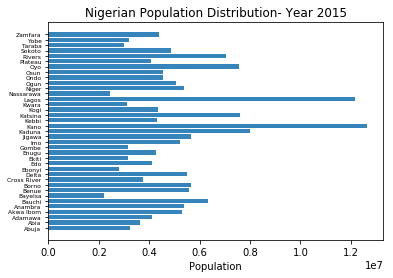

In [99]:
#plot a histogram

#get maximuim value
height=np.max(nigerian_states.query("Date=='2015'")['Value'].values)
labels=nigerian_states.query("Date=='2015'")['state'].values
population=nigerian_states.query("Date=='2015'")['Value'].values

y = np.arange(len(labels))

plt.barh(y,population,alpha=0.9)
plt.yticks(y,labels,fontsize=6)
plt.xlabel('Population')
plt.title('Nigerian Population Distribution- Year 2015')
plt.show()
#plt.plot(x,y,population)

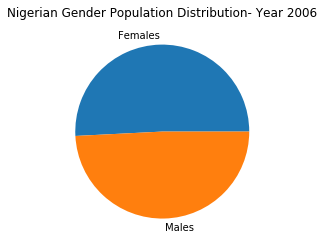

In [126]:
#Plat piechart of Females to Males n Nigeria in 2006
gender=nig_data.query("indicator=='Population of Nigeria' & Date=='2006' & state=='Nigeria' & (item=='Female' | item=='Male')")['Value'].values
labels=['Females','Males']


plt.pie(gender,labels=labels)
plt.title('Nigerian Gender Population Distribution- Year 2006')
plt.show()
